# DeepMost Agentic SDR - Exploratory Data Analysis

This notebook provides a template for analyzing sales simulation data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from pathlib import Path

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Paths
DATA_DIR = Path('../data/processed')
CONVERSATIONS_DIR = Path('../data/raw/conversations')

## 1. Load Data

In [2]:
# Load main datasets
master_df = pd.read_csv(DATA_DIR / 'simulations_master.csv')
turns_df = pd.read_csv(DATA_DIR / 'conversation_turns.csv')
metrics_df = pd.read_csv(DATA_DIR / 'simulation_metrics.csv')

print(f"Master Records: {len(master_df)}")
print(f"Conversation Turns: {len(turns_df)}")
print(f"Metrics Records: {len(metrics_df)}")

Master Records: 6
Conversation Turns: 40
Metrics Records: 6


In [3]:
# Preview data
master_df.head()

,simulation_id,timestamp,target_url,company_context_length,num_turns,total_seller_words,total_buyer_words,avg_seller_turn_length,avg_buyer_turn_length,score,outcome,key_objection,feedback,conversation_file
0,95ad97c9-57ab-4b61-9b4a-dc6d03b938dd,2026-02-08T13:04:30.400820,https://openai.com,41,2,222,90,74.00,45.00,3,Pending,Unknown,Auto-generated from batch pipeline. Sentiment:...,95ad97c9-57ab-4b61-9b4a-dc6d03b938dd.json
1,43290c94-50b8-418e-b69a-fe7a0f601def,2026-02-08T13:04:57.026424,https://deepmostai.com,1510,3,254,174,63.50,58.00,5,Success,Unknown,Auto-generated from batch pipeline. Sentiment:...,43290c94-50b8-418e-b69a-fe7a0f601def.json
2,752c57c7-3f4b-4f17-860e-174c717bb689,2026-02-08T13:05:17.121356,https://stripe.com,3000,3,282,159,94.00,53.00,5,Success,Unknown,Auto-generated from batch pipeline. Sentiment:...,752c57c7-3f4b-4f17-860e-174c717bb689.json
3,968daf59-917c-4a45-a46f-6eee2b9edd86,2026-02-08T13:05:36.891932,https://www.ibm.com,3000,3,287,169,95.67,56.33,3,Pending,Unknown,Auto-generated from batch pipeline. Sentiment:...,968daf59-917c-4a45-a46f-6eee2b9edd86.json
4,c7efa28d-4f2a-4a00-ac29-3d570b602488,2026-02-08T23:18:43.442043,https://www.salesforce.com/in/,3000,4,181,140,45.25,35.00,0,Error,Unknown,NaN,c7efa28d-4f2a-4a00-ac29-3d570b602488.json


In [4]:
# Data types and info
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   simulation_id           6 non-null      object 
 1   timestamp               6 non-null      object 
 2   target_url              6 non-null      object 
 3   company_context_length  6 non-null      int64  
 4   num_turns               6 non-null      int64  
 5   total_seller_words      6 non-null      int64  
 6   total_buyer_words       6 non-null      int64  
 7   avg_seller_turn_length  6 non-null      float64
 8   avg_buyer_turn_length   6 non-null      float64
 9   score                   6 non-null      int64  
 10  outcome                 6 non-null      object 
 11  key_objection           6 non-null      object 
 12  feedback                5 non-null      object 
 13  conversation_file       6 non-null      object 
dtypes: float64(2), int64(5), object(7)
memory usag

## 2. Basic Statistics

In [5]:
# Descriptive statistics
metrics_df.describe()

,context_length,num_turns,seller_total_words,buyer_total_words,seller_avg_words_per_turn,buyer_avg_words_per_turn,seller_max_words,buyer_max_words,seller_min_words,buyer_min_words,word_ratio_seller_buyer,total_conversation_length,score,outcome_binary
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2258.500000,3.166667,231.500000,146.833333,68.861667,47.430000,89.000000,55.666667,47.166667,37.000000,1.630000,378.333333,4.166667,0.500000
std,1239.100278,0.752773,51.902794,30.524853,23.467207,9.859026,29.644561,7.501111,24.020130,19.788886,0.482949,70.019045,2.994439,0.547723
min,41.000000,2.000000,163.000000,90.000000,40.750000,35.000000,51.000000,48.000000,21.000000,0.000000,1.090000,312.000000,0.000000,0.000000
25%,1882.500000,3.000000,191.250000,142.250000,49.812500,39.187500,63.750000,50.000000,26.500000,34.750000,1.332500,314.250000,3.000000,0.000000
50%,3000.000000,3.000000,238.000000,154.000000,68.750000,49.000000,97.000000,54.500000,46.000000,42.500000,1.580000,374.500000,4.000000,0.500000
75%,3000.000000,3.750000,275.000000,166.500000,89.000000,55.497500,113.750000,59.750000,67.750000,46.500000,1.752500,437.750000,5.000000,1.000000
max,3000.000000,4.000000,287.000000,174.000000,95.670000,58.000000,117.000000,67.000000,75.000000,57.000000,2.470000,456.000000,9.000000,1.000000


In [6]:
# Outcome distribution
print("Outcome Distribution:")
print(metrics_df['outcome_label'].value_counts())
print(f"\nSuccess Rate: {metrics_df['outcome_binary'].mean()*100:.1f}%")

Outcome Distribution:
outcome_label
Success    3
Pending    2
Error      1
Name: count, dtype: int64

Success Rate: 50.0%


## 3. Visualizations

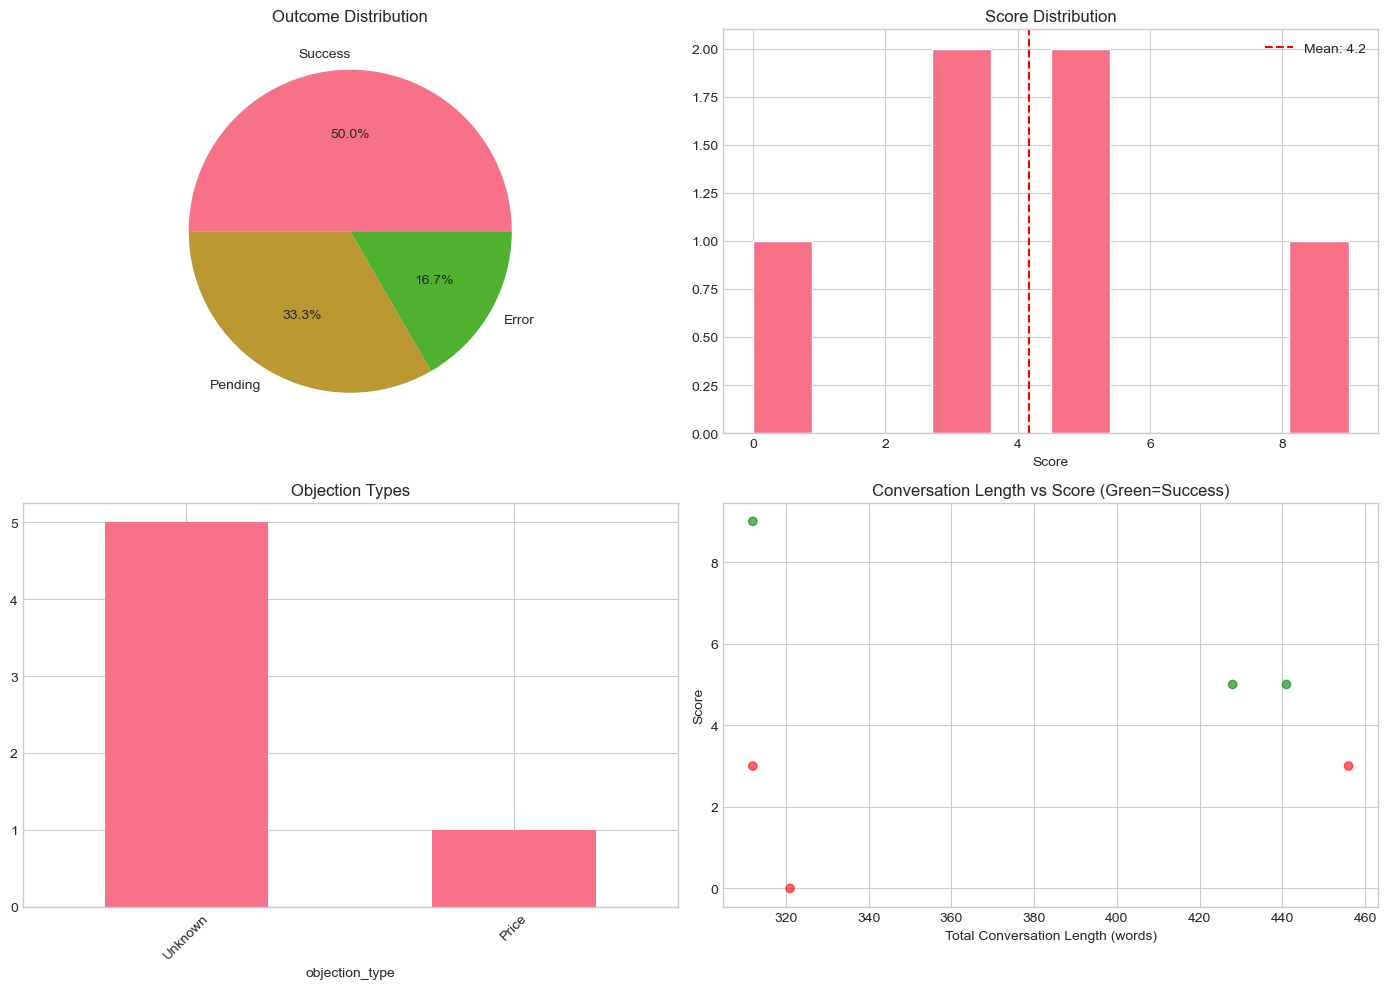

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Outcome Pie Chart
metrics_df['outcome_label'].value_counts().plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%')
axes[0,0].set_title('Outcome Distribution')
axes[0,0].set_ylabel('')

# 2. Score Distribution
metrics_df['score'].hist(ax=axes[0,1], bins=10, edgecolor='white')
axes[0,1].axvline(metrics_df['score'].mean(), color='red', linestyle='--', label=f'Mean: {metrics_df["score"].mean():.1f}')
axes[0,1].set_title('Score Distribution')
axes[0,1].set_xlabel('Score')
axes[0,1].legend()

# 3. Objection Types
metrics_df['objection_type'].value_counts().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Objection Types')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Conversation Length vs Score
colors = ['green' if x == 1 else 'red' for x in metrics_df['outcome_binary']]
axes[1,1].scatter(metrics_df['total_conversation_length'], metrics_df['score'], c=colors, alpha=0.6)
axes[1,1].set_xlabel('Total Conversation Length (words)')
axes[1,1].set_ylabel('Score')
axes[1,1].set_title('Conversation Length vs Score (Green=Success)')

plt.tight_layout()
plt.savefig('../data/processed/eda_overview.png', dpi=150)
plt.show()

## 4. Turn-Level Analysis

In [8]:
# Average message length by speaker
print("Average Word Count by Speaker:")
print(turns_df.groupby('speaker')['word_count'].mean())

Average Word Count by Speaker:
speaker
Buyer     46.368421
Seller    66.142857
Name: word_count, dtype: float64


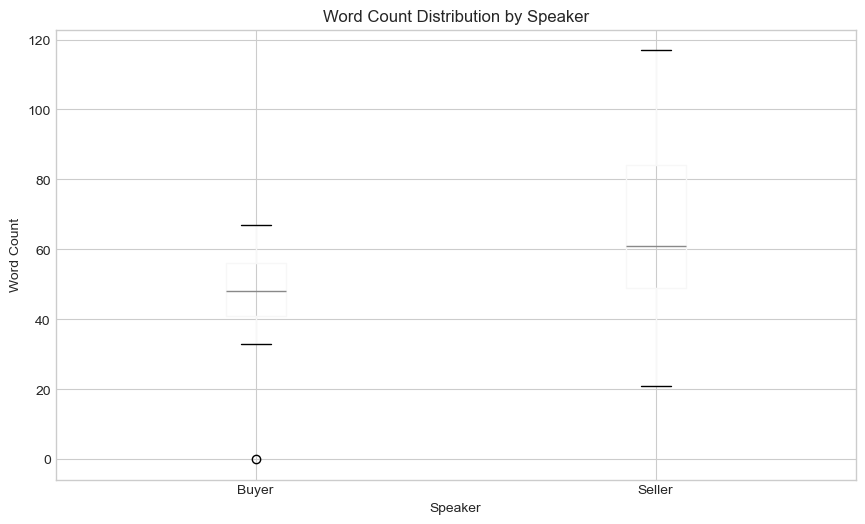

In [9]:
# Word count distribution by speaker
fig, ax = plt.subplots(figsize=(10, 6))
turns_df.boxplot(column='word_count', by='speaker', ax=ax)
ax.set_title('Word Count Distribution by Speaker')
ax.set_xlabel('Speaker')
ax.set_ylabel('Word Count')
plt.suptitle('')
plt.show()

## 5. Correlation Analysis

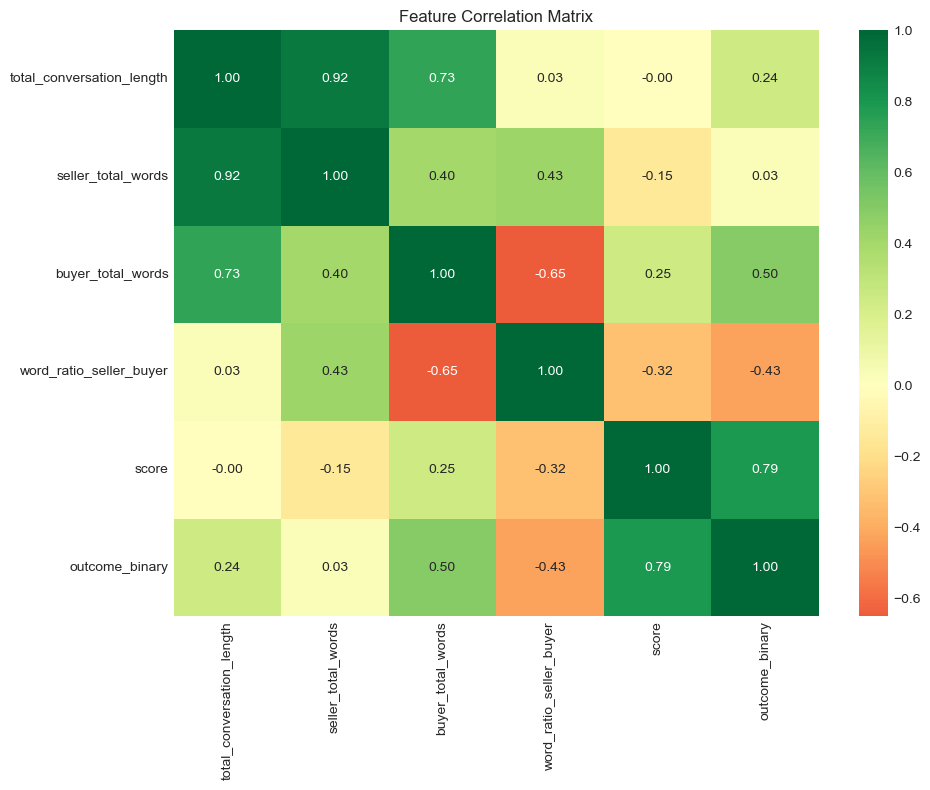

In [10]:
# Feature correlations
numeric_cols = ['total_conversation_length', 'seller_total_words', 'buyer_total_words', 
                'word_ratio_seller_buyer', 'score', 'outcome_binary']

corr_matrix = metrics_df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('../data/processed/correlation_matrix.png', dpi=150)
plt.show()

## 6. Success Factor Analysis

In [11]:
# Compare metrics between successful and failed calls
comparison = metrics_df.groupby('outcome_binary').agg({
    'total_conversation_length': 'mean',
    'word_ratio_seller_buyer': 'mean',
    'seller_avg_words_per_turn': 'mean',
    'buyer_avg_words_per_turn': 'mean',
    'score': 'mean'
}).rename(index={0: 'Failed', 1: 'Success'})

print("\nMetrics Comparison: Success vs Failed")
comparison.round(2)


Metrics Comparison: Success vs Failed


,total_conversation_length,word_ratio_seller_buyer,seller_avg_words_per_turn,buyer_avg_words_per_turn,score
outcome_binary,,,,,
Failed,363.00,1.82,71.64,45.44,2.00
Success,393.67,1.44,66.08,49.42,6.33


## 7. Load Individual Conversation (Example)

In [12]:
# Load a sample conversation
json_files = list(CONVERSATIONS_DIR.glob('*.json'))
if json_files:
    with open(json_files[0]) as f:
        sample_conv = json.load(f)
    
    print(f"Simulation ID: {sample_conv['simulation_id'][:8]}...")
    print(f"Target URL: {sample_conv['target_url']}")
    print(f"\nConversation:")
    for turn in sample_conv['conversation']:
        print(f"  [{turn['speaker']}]: {turn['message'][:100]}...")
else:
    print("No conversation files found. Run some simulations first!")

Simulation ID: 43290c94...
Target URL: https://deepmostai.com

Conversation:
  [Seller]: Alex from DeepData AI. Hope I'm catching you at an okay time, Dr. Reed. My reason for reaching out i...
  [Buyer]: Alex, always great to hear from another AI vendor. Let me guess, you've got a brilliant AI that's go...
  [Seller]: I completely understand that sentiment, Dr. Reed, and honestly, it's a huge problem in the industry ...
  [Buyer]: Okay, so not sales conversations, but you still want my operational data. How is that any different?...
  [Seller]: You're hitting on a critical point that many vendors sidestep. While DeepData AI isn't an 'offline o...
  [Buyer]: Hmm. So you're saying my data isn't just pooled with everyone else's on a vendor-controlled server, ...
  [Seller]: Exactly, Dr. Reed. Our goal is to empower you with insights *without* compromising your security pos...


## 8. Simple ML Model (Classification)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Check if we have enough data
if len(metrics_df) >= 10:
    # Features
    feature_cols = ['total_conversation_length', 'word_ratio_seller_buyer', 
                    'seller_avg_words_per_turn', 'buyer_avg_words_per_turn',
                    'context_length']
    
    X = metrics_df[feature_cols].fillna(0)
    y = metrics_df['outcome_binary']
    
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    # Evaluate
    print(f"Training Accuracy: {model.score(X_train_scaled, y_train):.2f}")
    print(f"Test Accuracy: {model.score(X_test_scaled, y_test):.2f}")
    
    # Feature importance
    importance = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nFeature Importance:")
    print(importance)
else:
    print(f"Need at least 10 samples for ML. Currently have {len(metrics_df)}. Run more simulations!")

Need at least 10 samples for ML. Currently have 6. Run more simulations!


## 9. Export Summary Report

In [14]:
# Generate summary report
report = f"""
# DeepMost Agentic SDR - Analysis Report
Generated: {pd.Timestamp.now()}

## Dataset Overview
- Total Simulations: {len(metrics_df)}
- Total Conversation Turns: {len(turns_df)}
- Success Rate: {metrics_df['outcome_binary'].mean()*100:.1f}%
- Average Score: {metrics_df['score'].mean():.2f}/10

## Key Findings
- Average Conversation Length: {metrics_df['total_conversation_length'].mean():.0f} words
- Seller/Buyer Word Ratio: {metrics_df['word_ratio_seller_buyer'].mean():.2f}
- Most Common Objection: {metrics_df['objection_type'].mode().iloc[0] if len(metrics_df) > 0 else 'N/A'}

## Recommendations
Based on the data analysis:
1. Collect more simulations for robust modeling (target: 100+)
2. Analyze successful calls to identify winning patterns
3. Use turn-level data for dialogue flow analysis
"""

with open('../data/processed/analysis_report.md', 'w') as f:
    f.write(report)

print("Report saved to data/processed/analysis_report.md")
print(report)

Report saved to data/processed/analysis_report.md

# DeepMost Agentic SDR - Analysis Report
Generated: 2026-02-09 00:42:34.070676

## Dataset Overview
- Total Simulations: 6
- Total Conversation Turns: 40
- Success Rate: 50.0%
- Average Score: 4.17/10

## Key Findings
- Average Conversation Length: 378 words
- Seller/Buyer Word Ratio: 1.63
- Most Common Objection: Unknown

## Recommendations
Based on the data analysis:
1. Collect more simulations for robust modeling (target: 100+)
2. Analyze successful calls to identify winning patterns
3. Use turn-level data for dialogue flow analysis

